In [154]:
import pandas as pd
import matplotlib.pyplot as plt

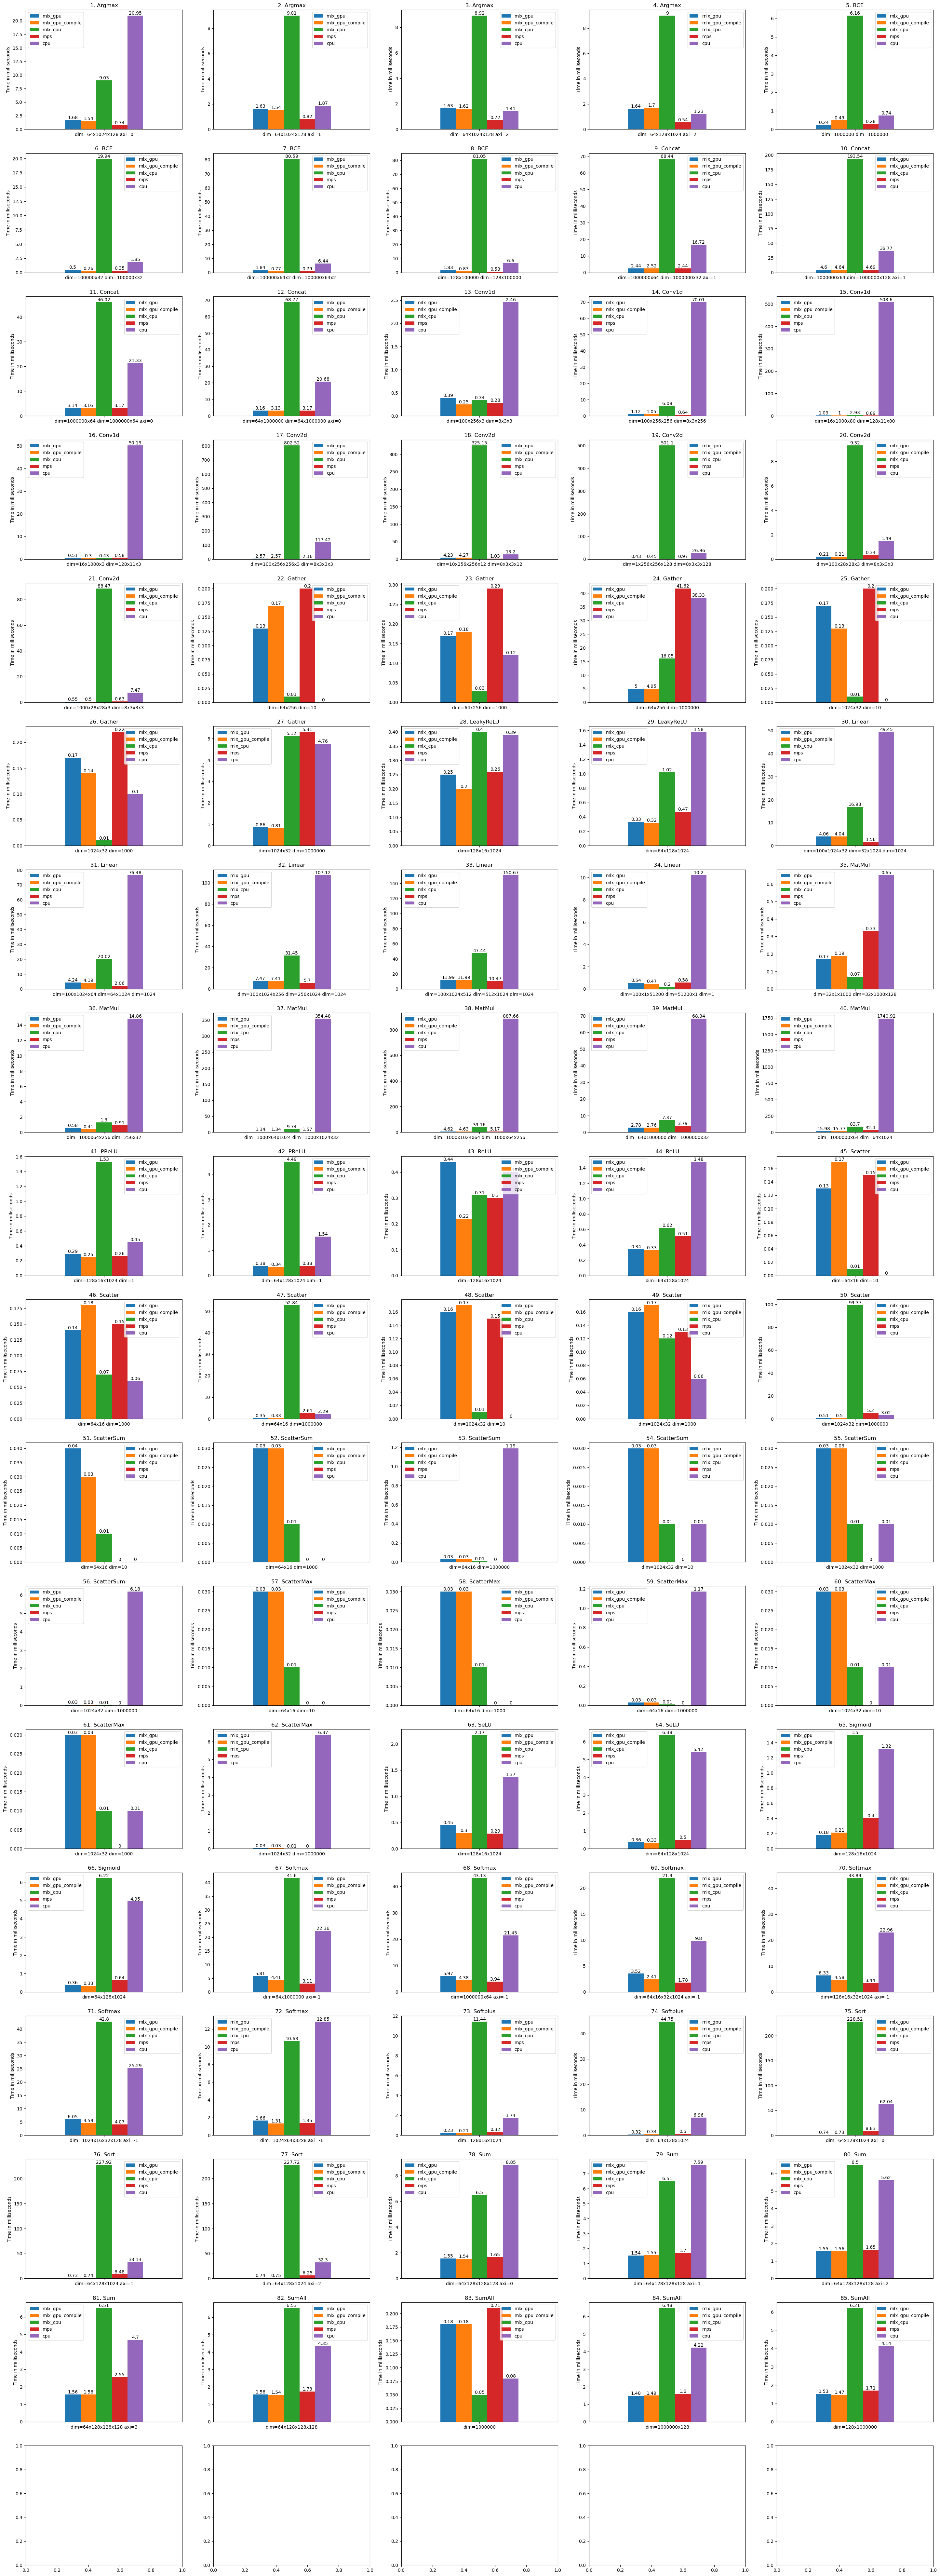

In [153]:
def process(row, ax):
    
    _data = {}
    _data.setdefault('mlx_gpu', []).append(row[2])
    _data.setdefault('mlx_gpu_compile', []).append(row[3])
    _data.setdefault('mlx_cpu', []).append(row[4])
    _data.setdefault('mps', []).append(row[5])
    _data.setdefault('cpu', []).append(row[6])
    columns=['mlx_gpu', 'mlx_gpu_compile','mlx_cpu','mps','cpu']
    _df = pd.DataFrame(_data, index=[row[1]])
    u = _df[columns].plot.bar(ax=ax,rot=0)
   
    for container in u.containers:
        u.bar_label(container)
    u.set_ylabel("Time in milliseconds")
  
    

df = pd.read_csv('benchmark6.csv');
number_of_diagrams = len(df)
columns = 5  # Desired number of columns
rows = number_of_diagrams//columns  # Calculate rows needed
fig, axs = plt.subplots(number_of_diagrams//columns+1, columns, figsize=(36, rows*6))  # Adjust the figure size as needed

for i in range(number_of_diagrams):
    process(df.iloc[i,:], axs[i//columns, i%columns])
    axs[i//columns, i%columns].set_title(f'{i+1}. {df.iloc[i,0]}')
